In [17]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json

file_dir = "../outputs/12_26/"
model_list = ["Qwen/Qwen2.5-32B-Instruct", "Qwen/Qwen2.5-14B-Instruct", "Qwen/Qwen2.5-7B-Instruct", "Qwen/Qwen2.5-3B-Instruct", "Qwen/Qwen2.5-1.5B-Instruct", "mistralai/Mathstral-7B-v0.1"]

In [18]:
dataset = "gsm8k"

prompt_type1 = "qwen25-math-cot"
prompt_type2 = "coarse-to-fine-qwen"
prompt_type3 = "mathstral-step-by-step"
prompt_type4 = "mathstral-coarse-to-fine"

something = "_-1_seed0_t0.0_s0_e-1"
acc_1 = []
acc_2 = []
for model in model_list:
    if model.startswith("Qwen"):    
        with open(os.path.join(file_dir, model, prompt_type1, dataset, "test_" + prompt_type1 + something + "_metrics.json")) as f:
            data1 = json.load(f)
            acc_1.append(data1["acc"])
        with open(os.path.join(file_dir, model, prompt_type2, dataset, "test_" + prompt_type2 + something + "_metrics.json")) as f:
            data2 = json.load(f)
            acc_2.append(data2["acc"])
    else:
        with open(os.path.join(file_dir, model, prompt_type3, dataset, "test_" + prompt_type3 + something + "_metrics.json")) as f:
            data3 = json.load(f)
            acc_1.append(data3["acc"])
        with open(os.path.join(file_dir, model, prompt_type4, dataset, "test_" + prompt_type4 + something + "_metrics.json")) as f:
            data4 = json.load(f)
            acc_2.append(data4["acc"])
print(acc_1)
print(acc_2)


[95.7, 94.9, 92.2, 85.8, 74.9, 82.2]
[94.7, 93.1, 89.3, 84.2, 66.2, 81.7]


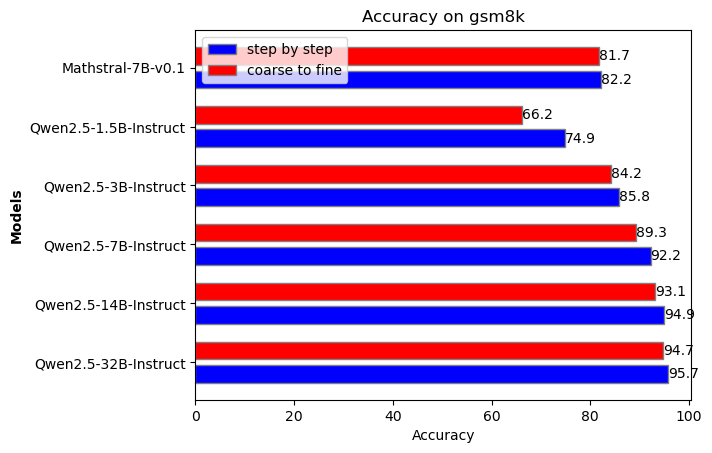

In [19]:
# plot horizontal bar chart for each model, and write the accuracy next to the bars
barWidth = 0.3  # Reduced bar width for thinner bars
spacing = 0.1    # Added spacing between the bars
r1 = np.arange(len(model_list))

plt.barh(r1, acc_1, color='b', edgecolor='grey', label="step by step", height=barWidth)
plt.barh(r1 + barWidth + spacing, acc_2, color='r', edgecolor='grey', label="coarse to fine", height=barWidth)

# 在柱子旁边添加数值标签
for i in range(len(model_list)):
    plt.text(acc_1[i], i, f'{acc_1[i]}', ha='left', va='center')
    plt.text(acc_2[i], i + barWidth + spacing, f'{acc_2[i]}', ha='left', va='center')

plt.ylabel('Models', fontweight='bold')
plt.yticks([r + (barWidth + spacing) / 2 for r in range(len(model_list))], [model.split("/")[-1] for model in model_list])
plt.xlabel('Accuracy')
plt.title('Accuracy on ' + dataset)
plt.legend()
plt.show()



In [20]:
dataset = "math"

prompt_type1 = "qwen25-math-cot"
prompt_type2 = "coarse-to-fine-qwen"
prompt_type3 = "mathstral-step-by-step"
prompt_type4 = "mathstral-coarse-to-fine"

something = "_-1_seed0_t0.0_s0_e-1"
acc_1 = []
acc_2 = []
for model in model_list:
    if model.startswith("Qwen"):    
        with open(os.path.join(file_dir, model, prompt_type1, dataset, "test_" + prompt_type1 + something + "_metrics.json")) as f:
            data1 = json.load(f)
            acc_1.append(data1["acc"])
        with open(os.path.join(file_dir, model, prompt_type2, dataset, "test_" + prompt_type2 + something + "_metrics.json")) as f:
            data2 = json.load(f)
            acc_2.append(data2["acc"])
    else:
        with open(os.path.join(file_dir, model, prompt_type3, dataset, "test_" + prompt_type3 + something + "_metrics.json")) as f:
            data3 = json.load(f)
            acc_1.append(data3["acc"])
        with open(os.path.join(file_dir, model, prompt_type4, dataset, "test_" + prompt_type4 + something + "_metrics.json")) as f:
            data4 = json.load(f)
            acc_2.append(data4["acc"])
print(acc_1)
print(acc_2)


[83.0, 79.3, 74.2, 67.0, 55.8, 52.7]
[80.6, 76.6, 70.3, 62.9, 44.3, 48.8]


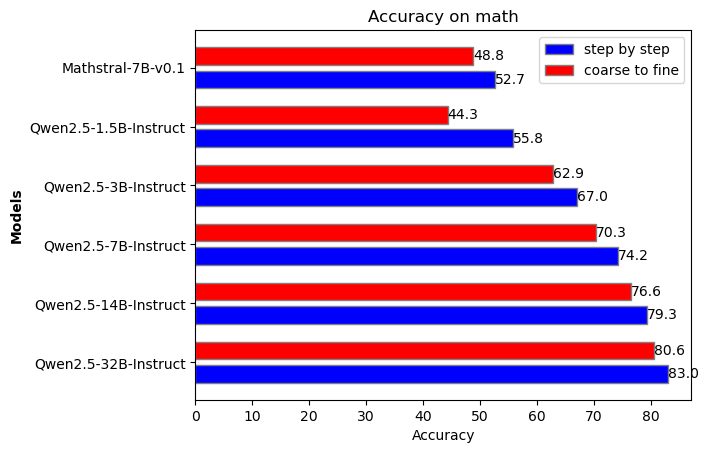

In [21]:
# plot horizontal bar chart for each model, and write the accuracy next to the bars
barWidth = 0.3  # Reduced bar width for thinner bars
spacing = 0.1    # Added spacing between the bars
r1 = np.arange(len(model_list))

plt.barh(r1, acc_1, color='b', edgecolor='grey', label="step by step", height=barWidth)
plt.barh(r1 + barWidth + spacing, acc_2, color='r', edgecolor='grey', label="coarse to fine", height=barWidth)

# 在柱子旁边添加数值标签
for i in range(len(model_list)):
    plt.text(acc_1[i], i, f'{acc_1[i]}', ha='left', va='center')
    plt.text(acc_2[i], i + barWidth + spacing, f'{acc_2[i]}', ha='left', va='center')

plt.ylabel('Models', fontweight='bold')
plt.yticks([r + (barWidth + spacing) / 2 for r in range(len(model_list))], [model.split("/")[-1] for model in model_list])
plt.xlabel('Accuracy')
plt.title('Accuracy on ' + dataset)
plt.legend()
plt.show()

